<a href="https://colab.research.google.com/github/mellisairawan/13619063_Aerotraining_2021/blob/master/EMB-214%20Super%20Tucano%20Performance%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [30]:
# KNOWN VARIABLES
# Geometry
wing_area = 19.4 #m2
empty_weight = 3200 #kg (inc. pilot)
max_fuel_weight = 900 #kg
max_to_weight = 5400 #kg
max_payload_weight = 1500 #kg (weapon)

# Aerodynamic Data
CLmax_clean = 1.7
CLmax_TO = 1.9
CLmax_LD = 2.1
drag_polar_clean = 0.018 + 0.065*CLmax_clean**2
drag_polar_TO = 0.0320 + 0.065*CLmax_TO**2
drag_polar_LD = 0.0525 + 0.065*CLmax_LD**2

# Performance
max_speed = 590 #km/h
stall_speed = 148 #km/h
range = 1330 #km
combat_range = 550 #km (+1500 kg)
ferry_range = 2855 #km
endurance = 8.5 #hour
service_ceiling = 10700 #m
max_ROC = 16.4 #m/s
TO_distance = 350 #m (light weight)
LD_distance = 550 #m (light weight)
G_limit = 7

# Engine Data
max_power_sea_level = 1600*745.7 #SHP into Watt
max_power_5000m = 1360*745.7 #SHP into Watt
max_power_10000m = 1120*745.7 #SHP into Watt
propeller_efficiency = 0.8
specific_fuel_cons = 0.54 #lb/HPhr

In [40]:
# Properties when flying at sea level
air_density_SL = 1.225 #kg/m3
air_density_5000 = 0.736116 #kg/m3
air_density_10000 = 0.412707 #kg/m3
gravity = 9.81 #m/s2
weight = 4000 * gravity # N (aircraft weight)
power_available_SL = propeller_efficiency*max_power_sea_level #in Watt
power_available_5000 = propeller_efficiency*max_power_5000m #in Watt
power_available_10000 = propeller_efficiency*max_power_10000m #in Watt

# **PART 1: PERFORMANCE ANALYSIS**
 

# **PROBLEM 1**

## **Problem 1a: Plot the hodograph of the aircraft (from minimum to maximum speed)**
Hodograph is a graph which describe the relationship of rate of descent versus horizontal speed.

In [171]:
# Assume that EMB-314 Super Tucano flies at sea level, then...
air_density = 1.225 #kg/m3
gravity = 9.81 #m/s2
weight = 4000 *9.81 # N (aircraft weight)

# Create Tables for Hodograph
hodograph_data = pd.DataFrame()
hodograph_data["CL"] = pd.Series(np.arange(0, CLmax_clean+0.001, 0.001))
hodograph_data["CD"] = 0.018 + (0.065*hodograph_data["CL"]**2)
hodograph_data["Glide Angle"] = np.arctan(hodograph_data["CD"]/hodograph_data["CL"]) # in radian
hodograph_data["True Speed"] = np.sqrt((2*weight*np.cos(hodograph_data["Glide Angle"])/(air_density*wing_area*hodograph_data["CL"]))) # in m/s
hodograph_data["Horizontal Speed"] = hodograph_data["True Speed"]*np.cos(hodograph_data["Glide Angle"]) # in m/s
hodograph_data["Vertical Speed"] = hodograph_data["True Speed"]*np.sin(hodograph_data["Glide Angle"]) # in m/s. equal to rate of descent

hodograph_data

,CL,CD,Glide Angle,True Speed,Horizontal Speed,Vertical Speed
0,0.00000,0.01800,1.57080,inf,inf,inf
1,0.00100,0.01800,1.51530,427.99527,23.74082,427.33631
2,0.00200,0.01800,1.46014,427.01097,47.15480,424.39933
3,0.00300,0.01800,1.40565,425.39528,69.93234,419.60768
4,0.00400,0.01800,1.35214,423.18367,91.79637,413.10755
...,...,...,...,...,...,...
1696,1.69600,0.20497,0.12027,43.96665,43.64905,5.27513
1697,1.69700,0.20519,0.12033,43.95354,43.63573,5.27608
1698,1.69800,0.20541,0.12039,43.94044,43.62242,5.27703
1699,1.69900,0.20563,0.12044,43.92735,43.60912,5.27799


Text(0.5, 1.0, 'Hodograf Pesawat EMB-214 Super Tucano')

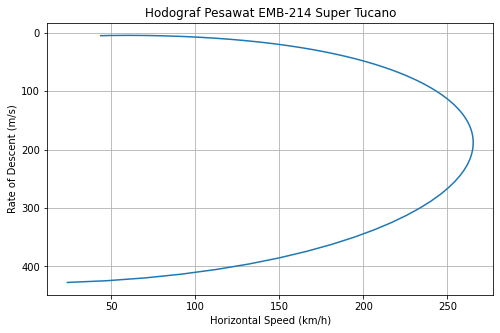

In [172]:
# Visualize the Hodograph
plt.figure(figsize=(8,5))
plt.plot(hodograph_data["Horizontal Speed"], hodograph_data["Vertical Speed"])
plt.grid()
plt.xlabel("Horizontal Speed (km/h)")
plt.ylabel("Rate of Descent (m/s)")
plt.gca().invert_yaxis()
plt.title("Hodograf Pesawat EMB-214 Super Tucano")

## **Problem 1b: From the Hodograph plot, determine the minimum glide angle and the minimum rate of descent**

In [174]:
# Find minimum rate of descent
min_rate_of_descent = hodograph_data["Vertical Speed"].min()
print(f"Minumum Rate of Descent is {min_rate_of_descent} m/s")

# Find minimum glide angle
min_glide_angle = hodograph_data["Glide Angle"].min()
print(f"Minumum Glide Angle is {min_glide_angle*180/np.pi} degree")

Minumum Rate of Descent is 4.732604744543734 m/s
Minumum Glide Angle is 3.9135372573758946 degree


When Glide Angle is minimum, Horizontal Speed is ...
         CL      CD  Glide Angle  True Speed  Horizontal Speed  Vertical Speed
526 0.52600 0.03598      0.06830    79.14268          78.95814         5.40157


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 1.0, 'Hodograf Pesawat EMB-214 Super Tucano')

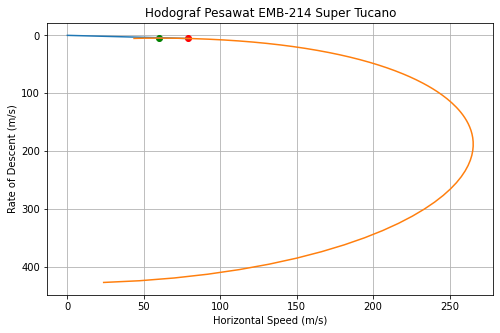

In [178]:
# Find Minimum Glide Angle and Minimum Rate of Descent through Hodograph
# Point 1: Origin Point
point1 = [0, 0]

# Point 2: Horizontal Speed and Vertical Speed data when Glide angle is minimum ...
min_glide_angle_data = hodograph_data[hodograph_data["Glide Angle"] == min_glide_angle] 
print("When Glide Angle is minimum, Horizontal Speed is ...")
print(min_glide_angle_data)
point2 = [min_glide_angle_data["Horizontal Speed"], min_glide_angle_data["Vertical Speed"]]

# Point 3: Horizontal Speed and Vertical Speed data when R/D is minimum
min_rate_of_descent_data = hodograph_data[hodograph_data["Vertical Speed"] == min_rate_of_descent] 
point3 = [min_rate_of_descent_data["Horizontal Speed"], min_rate_of_descent_data["Vertical Speed"]]

# Visualization
plt.figure(figsize=(8,5))

# Plot points
plt.plot(point2[0], point2[1], 'ro')
plt.plot(point3[0], point3[1], 'go')

# Plot linear line between point 1 and point 2 to find Glide Angle
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values)

# Plot Hodograph (same as previous)
plt.plot(hodograph_data["Horizontal Speed"], hodograph_data["Vertical Speed"])

plt.grid()
plt.xlabel("Horizontal Speed (m/s)")
plt.ylabel("Rate of Descent (m/s)")
plt.gca().invert_yaxis()
plt.title("Hodograf Pesawat EMB-214 Super Tucano")

# **PROBLEM 2**

In [44]:
def goal_seek(CL, RATIO_CL_CD, _threshold, AIR_DENSITY, POWER_AVAILABLE):
    threshold = _threshold
    for gamma_angle in np.arange(-90, 90, 0.0001).tolist():
      gamma_angle = gamma_angle * np.pi /180
      LHS = np.tan(gamma_angle)
      RHS = (POWER_AVAILABLE/np.sqrt(2*(weight*np.cos(gamma_angle))**3/(wing_area*AIR_DENSITY*CL)))-(1/RATIO_CL_CD)
      diff = np.abs(RHS-LHS)
      if np.abs(diff) <= threshold:
        break
            
    return gamma_angle

In [45]:
def performance_data(AIR_DENSITY, POWER_AVAILABLE):
  # Create Tables for Performance Diagram in Sea Level
  performance_data = pd.DataFrame()
  performance_data["CL"] = pd.Series(np.arange(CLmax_clean, 0, -0.01))
  performance_data["CD"] = 0.018 + (0.065*performance_data["CL"]**2)
  performance_data["CL/CD"] = performance_data["CL"]/performance_data["CD"]
  performance_data["CL3/CD2"] = performance_data["CL"]**3/performance_data["CD"]**2

  # Iteration for finding Gamma
  performance_data["gamma"] = performance_data.apply(lambda x: goal_seek(x["CL"], x["CL/CD"], 0.000001, AIR_DENSITY, POWER_AVAILABLE), axis=1)
  
  performance_data["Airspeed"] = np.sqrt(2*weight*np.cos(performance_data["gamma"])/(wing_area*AIR_DENSITY*performance_data["CL"]))
  performance_data["Drag"] = 0.5*AIR_DENSITY*wing_area*performance_data["CD"]*performance_data["Airspeed"]**2
  performance_data["Power Required"] = performance_data["Drag"]*performance_data["Airspeed"]
  performance_data["Power Excessive"] = POWER_AVAILABLE - performance_data["Power Required"]
  performance_data["Rate of Climb"] = performance_data["Power Excessive"]/weight

  # Cleaning the Data
  performance_data = performance_data[performance_data["Drag"]>1]
  return performance_data

In [ ]:
# Iteration needs approx. 30 minutes
#performance_data_SL = performance_data(air_density_SL, power_available_SL)
#performance_data_SL

,CL,CD,CL/CD,CL3/CD2,gamma,Airspeed,Drag,Power Required,Power Excessive,Rate of Climb
0,1.70,0.205850,8.258441,115.943130,0.505252,41.229038,4157.814430,1.714227e+05,7.830733e+05,19.955997
1,1.69,0.203646,8.298694,116.387466,0.503383,41.372174,4141.917557,1.713601e+05,7.831359e+05,19.957591
2,1.68,0.201456,8.339290,116.833512,0.501515,41.516418,4125.986363,1.712962e+05,7.831998e+05,19.959221
3,1.67,0.199278,8.380232,117.281233,0.499648,41.661810,4110.025599,1.712311e+05,7.832649e+05,19.960879
4,1.66,0.197114,8.421523,117.730590,0.497782,41.808345,4094.032130,1.711647e+05,7.833313e+05,19.962571
...,...,...,...,...,...,...,...,...,...,...
163,0.07,0.018318,3.821274,1.022149,-0.146807,216.029527,10158.368477,2.194508e+06,-1.240012e+06,-31.600702
164,0.06,0.018234,3.290556,0.649666,-0.194709,232.376653,11699.700846,2.718737e+06,-1.764241e+06,-44.960278
165,0.05,0.018162,2.752925,0.378930,-0.257836,252.712236,13782.753548,3.483070e+06,-2.528574e+06,-64.438697
166,0.04,0.018104,2.209456,0.195268,-0.345420,278.714799,16710.999327,4.657603e+06,-3.703107e+06,-94.370714


In [46]:
# Iteration needs approx. 30 minutes
#performance_data_5000 = performance_data(air_density_5000, power_available_5000)
#performance_data_5000

,CL,CD,CL/CD,CL3/CD2,gamma,Airspeed,Drag,Power Required,Power Excessive,Rate of Climb
0,1.70,0.205850,8.258441,115.943130,0.255289,55.927678,4597.507483,2.571279e+05,5.541937e+05,14.123182
1,1.69,0.203646,8.298694,116.387466,0.254705,56.097175,4575.904287,2.566953e+05,5.546263e+05,14.134207
2,1.68,0.201456,8.339290,116.833512,0.254115,56.268199,4554.327257,2.562638e+05,5.550578e+05,14.145204
3,1.67,0.199278,8.380232,117.281233,0.253521,56.440760,4532.774755,2.558333e+05,5.554883e+05,14.156176
4,1.66,0.197114,8.421523,117.730590,0.252924,56.614879,4511.247251,2.554037e+05,5.559179e+05,14.167122
...,...,...,...,...,...,...,...,...,...,...
162,0.08,0.018416,4.344049,1.509661,-0.148877,260.642430,8933.127449,2.328352e+06,-1.517030e+06,-38.660307
163,0.07,0.018318,3.821274,1.022149,-0.183893,277.820317,10095.687620,2.804787e+06,-1.993466e+06,-50.801874
164,0.06,0.018234,3.290556,0.649666,-0.228748,298.674703,11614.401212,3.468928e+06,-2.657606e+06,-67.726968
165,0.05,0.018162,2.752925,0.378930,-0.288526,324.603957,13664.735787,4.435627e+06,-3.624306e+06,-92.362531


In [47]:
# Iteration needs approx. 30 minutes
#performance_data_10000 = performance_data(air_density_10000, power_available_10000)
#performance_data_10000

,CL,CD,CL/CD,CL3/CD2,gamma,Airspeed,Drag,Power Required,Power Excessive,Rate of Climb
0,1.70,0.205850,8.258441,115.943130,0.104619,75.725603,4725.523379,3.578431e+05,3.103041e+05,7.907852
1,1.69,0.203646,8.298694,116.387466,0.104538,75.949632,4702.641495,3.571639e+05,3.109833e+05,7.925161
2,1.68,0.201456,8.339290,116.833512,0.104454,76.175672,4679.790016,3.564862e+05,3.116610e+05,7.942432
3,1.67,0.199278,8.380232,117.281233,0.104369,76.403745,4656.968585,3.558098e+05,3.123374e+05,7.959668
4,1.66,0.197114,8.421523,117.730590,0.104280,76.633888,4634.178570,3.551351e+05,3.130121e+05,7.976862
...,...,...,...,...,...,...,...,...,...,...
163,0.07,0.018318,3.821274,1.022149,-0.211420,370.014730,10040.180142,3.715015e+06,-3.046867e+06,-77.646976
164,0.06,0.018234,3.290556,0.649666,-0.254050,397.647161,11542.271686,4.589752e+06,-3.921604e+06,-99.938949
165,0.05,0.018162,2.752925,0.378930,-0.311374,431.987798,13568.509911,5.861431e+06,-5.193284e+06,-132.346675
166,0.04,0.018104,2.209456,0.195268,-0.392408,475.840713,16410.102940,7.808595e+06,-7.140448e+06,-181.968600


In [221]:
#### To skip doing iteration again, here is imported csv of above iteration
performance_data_SL = pd.read_csv("https://raw.githubusercontent.com/mellisairawan/13619063_Aerotraining_2021/master/Mellisa%20Irawan%20Aircraft%20Performance/performance_data_SL.csv")
performance_data_5000 = pd.read_csv("https://raw.githubusercontent.com/mellisairawan/13619063_Aerotraining_2021/master/Mellisa%20Irawan%20Aircraft%20Performance/performance_data_5000.csv")
performance_data_10000 = pd.read_csv("https://raw.githubusercontent.com/mellisairawan/13619063_Aerotraining_2021/master/Mellisa%20Irawan%20Aircraft%20Performance/performance_data_10000.csv")

Text(0, 0.5, 'Power (Watt)')

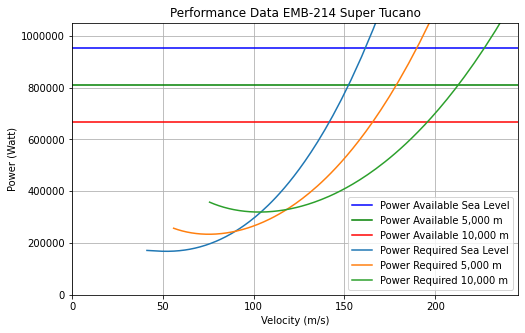

In [222]:
# Plot Performance Graph
power_available_SL = propeller_efficiency*max_power_sea_level
power_available_5000 = propeller_efficiency*max_power_5000m
power_available_10000 = propeller_efficiency*max_power_10000m

plt.figure(figsize=(8,5))
plt.axhline(y=power_available_SL, color="blue")
plt.axhline(y=power_available_5000, color="green")
plt.axhline(y=power_available_10000, color="red")

plt.plot(performance_data_SL["Airspeed"], performance_data_SL["Power Required"])
plt.plot(performance_data_5000["Airspeed"], performance_data_5000["Power Required"])
plt.plot(performance_data_10000["Airspeed"], performance_data_10000["Power Required"])

plt.grid()
# Set axes limit
plt.ticklabel_format(style='plain') 
plt.ylim(0, power_available*1.1)
plt.xlim(0, 1.5*max_speed*1000/3600)
plt.legend(['Power Available Sea Level', 'Power Available 5,000 m', 'Power Available 10,000 m', 'Power Required Sea Level', 'Power Required 5,000 m', 'Power Required 10,000 m'])

plt.title("Performance Data EMB-214 Super Tucano")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Power (Watt)")

## **Determine the maximum rate of climb for the three different altitudes**

In [130]:
print(f"""Maximum Rate of Climb\n 
Sea Level: {performance_data_SL["Rate of Climb"].max():4f} m/s\n
5,000 m: {performance_data_5000["Rate of Climb"].max():4f} m/s\n
10,000 m: {performance_data_10000["Rate of Climb"].max():.4f} m/s
""")

Maximum Rate of Climb
 
Sea Level: 20.043547 m/s

5,000 m: 14.714754 m/s

10,000 m: 8.8808 m/s



## **Determine the absolute ceiling and service ceiling of the aircraft**
Absolute ceiling is altitude when rate of climb is zero, or when power excess is zero. Service ceiling is altitude when rate of climb is equal 100 ft/min or 0.5 m/s.

In [134]:
# Do Linear Regression to find the correlation of rate of climb and height
from sklearn.linear_model import LinearRegression
max_rate_of_climb = np.array([performance_data_SL["Rate of Climb"].max(), performance_data_5000["Rate of Climb"].max(), performance_data_10000["Rate of Climb"].max()]).reshape((-1, 1))
height = np.array([0, 5000, 10000])

model = LinearRegression()
model.fit(max_rate_of_climb, height)
print(f"Height = {model.coef_}*RoC + {model.intercept_}")

Height = [-895.22677803]*RoC + 18022.301193869098


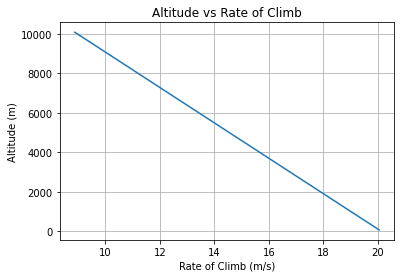

In [138]:
# Plot Linear Regression Result
plt.plot(max_rate_of_climb, model.coef_*max_rate_of_climb+model.intercept_)
plt.title("Altitude vs Rate of Climb")
plt.xlabel("Rate of Climb (m/s)")
plt.ylabel("Altitude (m)")
plt.grid()

In [139]:
roc_pred = np.array([0, 0.5]).reshape(-1,1)
height_pred = model.predict(roc_pred)
# Find height when ...

# RoC = 0 (absolute ceiling)
print(f"Absolute ceiling is {height_pred[0]:.4f} m")

# RoC = 0.5 m/s (service ceiling)
print(f"Service ceiling is {height_pred[1]:.4f} m")

Absolute ceiling is 18022.3012 m
Service ceiling is 17574.6878 m


# **PROBLEM 3**

## **Problem 3a: Plot the boundaries of the Fan Diagram of the aircraft at sea level**

In [212]:
# Assume that EMB-314 Super Tucano flies at sea level, then...
air_density = 1.225 #kg/m3
gravity = 9.81 #m/s2

weight = 4000 *9.81 # N (aircraft weight)
load_factor_max = 7

# Create Tables for Fan Diagram
fandiagram_data = pd.DataFrame()
fandiagram_data["Load Factor"] = pd.Series(np.arange(1, load_factor_max+0.1, 0.1))
fandiagram_data["Airspeed"] = np.sqrt((2*fandiagram_data["Load Factor"]*weight)/(air_density*wing_area*CLmax_clean)) # in m/s
fandiagram_data["Turn Radius"] = fandiagram_data["Airspeed"]**2/(gravity*np.sqrt((fandiagram_data["Load Factor"]**2)-1))
fandiagram_data["Turn Rate"] = 1*fandiagram_data["Airspeed"]/fandiagram_data["Turn Radius"]

fandiagram_data

,Load Factor,Airspeed,Turn Radius,Turn Rate
0,1.00000,44.07437,inf,0.00000
1,1.10000,46.22559,475.32021,0.09725
2,1.20000,48.28105,358.22687,0.13478
3,1.30000,50.25252,309.90034,0.16216
4,1.40000,52.14950,282.94086,0.18431
...,...,...,...,...
56,6.60000,113.22911,200.33018,0.56521
57,6.70000,114.08368,200.26048,0.56968
58,6.80000,114.93190,200.19391,0.57410
59,6.90000,115.77390,200.13027,0.57849


In [213]:
CLstall = (2*load_factor_max*weight)/(air_density*wing_area*(max_speed*1000/3600)**2)

fandiagram_data2 = pd.DataFrame()
fandiagram_data2["CL"] = pd.Series(np.arange(CLmax_clean, CLstall, -0.1))
# Adding CL value when stall speed reach max speed
fandiagram_data2 = fandiagram_data2.append({'CL': CLstall}, ignore_index=True)
fandiagram_data2["Airspeed"] = np.sqrt((2*load_factor_max*weight)/(air_density*wing_area*fandiagram_data2["CL"])) # in m/s
fandiagram_data2["Turn Radius"] = fandiagram_data2["Airspeed"]**2/(gravity*np.sqrt((load_factor_max**2)-1))
fandiagram_data2["Turn Rate"] = 1*fandiagram_data2["Airspeed"]/fandiagram_data2["Turn Radius"]

# Adding Omega to zero
fandiagram_data2 = fandiagram_data2.append({'CL': CLstall,
                                            'Airspeed': fandiagram_data2['Airspeed'].iloc[-1],
                                            'Turn Radius': fandiagram_data2['Turn Radius'].iloc[-1],
                                            'Turn Rate': 0}, ignore_index=True)
fandiagram_data2

,CL,Airspeed,Turn Radius,Turn Rate
0,1.70000,116.60983,200.06940,0.58285
1,1.60000,120.19866,212.57374,0.56544
2,1.50000,124.14064,226.74532,0.54749
3,1.40000,128.49777,242.94141,0.52892
4,1.30000,133.34844,261.62921,0.50968
5,1.20000,138.79345,283.43165,0.48969
6,1.10000,144.96504,309.19816,0.46884
7,1.00000,152.04061,340.11798,0.44702
8,0.90000,160.26488,377.90887,0.42408
9,0.86064,163.88889,395.19314,0.41471


Text(0.5, 1.0, 'Fan Diagram EMB-214 Super Tucano')

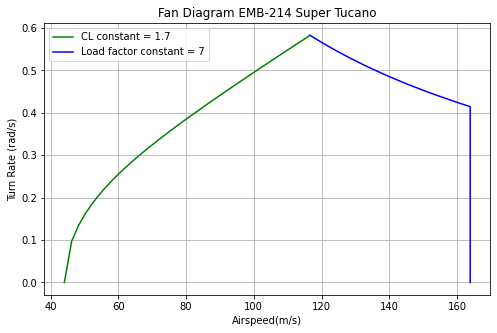

In [215]:
# Plot 
plt.figure(figsize=(8,5))
plt.plot(fandiagram_data['Airspeed'], fandiagram_data["Turn Rate"], color='g')
plt.plot(fandiagram_data2['Airspeed'], fandiagram_data2["Turn Rate"], color='b')
plt.grid()
plt.legend(["CL constant = 1.7", "Load factor constant = 7"])
plt.xlabel("Airspeed(m/s)")
plt.ylabel("Turn Rate (rad/s)")
plt.title("Fan Diagram EMB-214 Super Tucano")

## **Problem 3b: Turn radius, airspeed and turn rate at corner point in fan diagram**

The properties at corner point is 
Load Factor        7.000000
Airspeed         116.609826
Turn Radius      200.069399
Angular Speed      0.582847
Name: 60, dtype: float64


Text(0.5, 1.0, 'Fan Diagram EMB-214 Super Tucano')

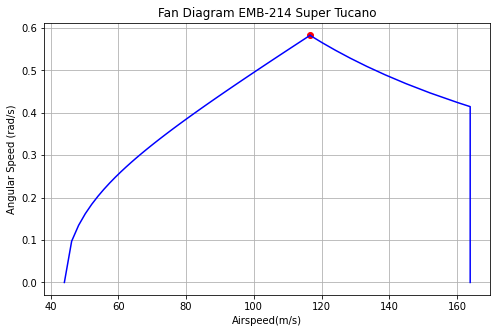

In [62]:
plt.figure(figsize=(8,5))

# Plot Corner Point
corner_point = fandiagram_data.iloc[-1]
print(f"The properties at corner point is \n{corner_point}")
plt.plot(corner_point["Airspeed"], corner_point["Turn Rate"], 'ro')

# Plot fan diagram
plt.plot(fandiagram_data['Airspeed'], fandiagram_data["Turn Rate"], color='b')
plt.plot(fandiagram_data2['Airspeed'], fandiagram_data2["Turn Rate"], color='b')
plt.grid()
plt.xlabel("Airspeed(m/s)")
plt.ylabel("Turn Rate (rad/s)")
plt.title("Fan Diagram EMB-214 Super Tucano")

## **Problem 3c: Plot the curve where Pe=0 (zero excess power) in the Fan Diagram**

In [217]:
power_available = propeller_efficiency*max_power_sea_level #in Watt
power_required = power_available
print(f"Power Reqiured value is {power_required} Watt")

weight = 4000 *9.81 # N (aircraft weight)

fandiagram_data3 = pd.DataFrame()
fandiagram_data3["CL"] = pd.Series(np.arange(CLmax_clean, 0, -0.001))
fandiagram_data3["CD"] = 0.018 + (0.065*fandiagram_data3["CL"]**2)
fandiagram_data3["CL/CD"] = fandiagram_data3["CL"]/fandiagram_data3["CD"]
fandiagram_data3["CL^3/CD^2"] = fandiagram_data3["CL"]**3/fandiagram_data3["CD"]**2
fandiagram_data3["Load Factor"] = ((fandiagram_data3["CL^3/CD^2"]*(power_required**2)*wing_area*air_density)/(2*weight**3))**(1/3)
fandiagram_data3["Airspeed"] = np.sqrt((2*weight*fandiagram_data3["Load Factor"])/(wing_area*air_density*fandiagram_data3["CL"]))
fandiagram_data3["Turn Rate"] = fandiagram_data3["Airspeed"]**2/(gravity*np.sqrt((fandiagram_data3["Load Factor"]**2)-1))
fandiagram_data3["Turn Rate"] = 1*fandiagram_data3["Airspeed"]/fandiagram_data3["Turn Rate"]

fandiagram_data3.dropna()

Power Reqiured value is 954496.0 Watt


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,CL,CD,CL/CD,CL^3/CD^2,Load Factor,Airspeed,Turn Rate
0,1.70000,0.20585,8.25844,115.94313,2.74898,73.07550,0.34375
1,1.69900,0.20563,8.26245,115.98749,2.74933,73.10166,0.34368
2,1.69800,0.20541,8.26646,116.03186,2.74968,73.12785,0.34361
3,1.69700,0.20519,8.27048,116.07625,2.75003,73.15405,0.34353
4,1.69600,0.20497,8.27450,116.12066,2.75038,73.18028,0.34346
...,...,...,...,...,...,...,...
1569,0.13100,0.01912,6.85309,6.15239,1.03301,161.37161,0.01575
1570,0.13000,0.01910,6.80682,6.02326,1.02573,161.41938,0.01388
1571,0.12900,0.01908,6.76042,5.89572,1.01844,161.46684,0.01172
1572,0.12800,0.01906,6.71389,5.76976,1.01113,161.51398,0.00909


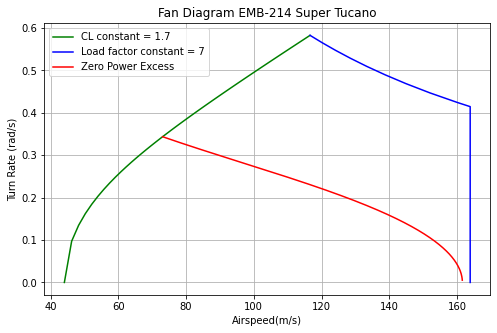

In [218]:
# Plot fan diagram
plt.figure(figsize=(8,5))
plt.plot(fandiagram_data['Airspeed'], fandiagram_data["Turn Rate"], color='green')
plt.plot(fandiagram_data2['Airspeed'], fandiagram_data2["Turn Rate"], color='blue')
plt.grid()

plt.xlabel("Airspeed(m/s)")
plt.ylabel("Turn Rate (rad/s)")
plt.title("Fan Diagram EMB-214 Super Tucano")

# Plot the curve where there is zero power excess
plt.plot(fandiagram_data3['Airspeed'], fandiagram_data3["Turn Rate"], color='red')

plt.legend(["CL constant = 1.7", "Load factor constant = 7", "Zero Power Excess"])

# **PROBLEM 4**

## **Problem 4a: Determine range of the following weight configurations**
(i) MTOW with maximum payload, <br>
(ii) MTOW with maximum fuel, <br>
(iii) weight with maximum fuel and no payload

In [65]:
# Assume that EMB-314 Super Tucano flies at sea level, then...
air_density = 1.225 #kg/m3
gravity = 9.81 #m/s2

empty_weight = 3200 #kg (inc. pilot)
max_fuel_weight = 900 #kg
max_to_weight = 5400 #kg
max_payload_weight = 1500 #kg (weapon)

weight_dict = {"Configuration": ["MTOW with maximum payload", "MTOW maximum fuel", "Maximum fuel no payload"],
               "Empty (kg)": [empty_weight, empty_weight, empty_weight],
               "Fuel (kg)": [max_to_weight-empty_weight-max_payload_weight, max_fuel_weight, max_fuel_weight],
               "Payload (kg)": [max_payload_weight, max_to_weight-empty_weight-max_fuel_weight, 0]}
range_data = pd.DataFrame(weight_dict)
range_data["Take Off Weight (kg)"] = range_data.sum(axis = 1, skipna = True)*gravity
range_data["Weight After Cruise (kg)"] = (range_data["Empty (kg)"] + range_data["Payload (kg)"])*gravity
range_data

,Configuration,Empty (kg),Fuel (kg),Payload (kg),Take Off Weight (kg),Weight After Cruise (kg)
0,MTOW with maximum payload,3200,700,1500,52974.0,46107.0
1,MTOW maximum fuel,3200,900,1300,52974.0,44145.0
2,Maximum fuel no payload,3200,900,0,40221.0,31392.0


To calculate maximum range, this equation is being used:<br>
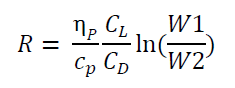

In [66]:
specific_fuel_cons = 8.94168*10**-4 #in 1/km
ratio_CL_CD_max = 14.6176322 #manual calculation

# Calculate 
range_data["Max. Range (km)"] = propeller_efficiency/specific_fuel_cons*ratio_CL_CD_max*np.log(range_data["Take Off Weight (kg)"]/range_data["Weight After Cruise (kg)"])
range_data

,Configuration,Empty (kg),Fuel (kg),Payload (kg),Take Off Weight (kg),Weight After Cruise (kg),Max. Range (km)
0,MTOW with maximum payload,3200,700,1500,52974.0,46107.0,1815.730455
1,MTOW maximum fuel,3200,900,1300,52974.0,44145.0,2384.437340
2,Maximum fuel no payload,3200,900,0,40221.0,31392.0,3241.250315


## **Problem 4b: Calculate endurance of those 3 configurations**

In [67]:
endurance_data = range_data.copy()
ratio_CL3_CD2_max = 146.068 #manual calculation
endurance_data["Endurance (second)"] = (2*propeller_efficiency/specific_fuel_cons*10**3)*np.sqrt(0.5*wing_area*air_density*ratio_CL3_CD2_max)*(1/np.sqrt(endurance_data["Weight After Cruise (kg)"]) - 1/np.sqrt(endurance_data["Take Off Weight (kg)"]))
endurance_data["Endurance (hours)"] = endurance_data["Endurance (second)"]/3600

endurance_data

,Configuration,Empty (kg),Fuel (kg),Payload (kg),Take Off Weight (kg),Weight After Cruise (kg),Max. Range (km),Endurance (second),Endurance (hours)
0,MTOW with maximum payload,3200,700,1500,52974.0,46107.0,1815.730455,23282.820489,6.467450
1,MTOW maximum fuel,3200,900,1300,52974.0,44145.0,2384.437340,30913.959530,8.587211
2,Maximum fuel no payload,3200,900,0,40221.0,31392.0,3241.250315,49037.335830,13.621482


## **Problem 4c: Plot Payload vs Range from calculation of a)**

Text(0.5, 0, 'Range (km)')

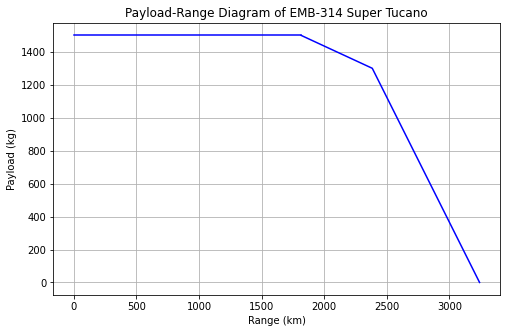

In [68]:
plt.figure(figsize=(8,5))
plt.plot([0, range_data['Max. Range (km)'][0]], [range_data['Payload (kg)'][0], range_data['Payload (kg)'][0]], color="blue")
plt.plot(range_data['Max. Range (km)'], range_data['Payload (kg)'], color="blue") 
plt.grid()
plt.title("Payload-Range Diagram of EMB-314 Super Tucano")
plt.ylabel("Payload (kg)")
plt.xlabel("Range (km)")

# **PART 2: PERFORMANCE DESIGN**

# **PROBLEM 7**

## **Problem 7a: Calculate the maximum speed for the Super Tucano, given the data above. How does the actual maximum speed compare to your calculation?**

In [69]:
# Get the performance data of sea level from Part 1: Problem 2
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# To skip doing iteration again, here is imported csv of above iteration
# performance_data_SL = pd.read_csv("/content/performance_data_SL.csv")
performance_data_SL

,Unnamed: 0,CL,CD,CL/CD,CL3/CD2,gamma,Airspeed,Drag,Power Required,Power Excessive,Rate of Climb
0,0,1.70000,0.20585,8.25844,115.94313,0.50525,41.22904,4157.81443,171422.69011,783073.30989,19.95600
1,1,1.69000,0.20365,8.29869,116.38747,0.50338,41.37217,4141.91756,171360.13226,783135.86774,19.95759
2,2,1.68000,0.20146,8.33929,116.83351,0.50152,41.51642,4125.98636,171296.17588,783199.82412,19.95922
3,3,1.67000,0.19928,8.38023,117.28123,0.49965,41.66181,4110.02560,171231.10368,783264.89632,19.96088
4,4,1.66000,0.19711,8.42152,117.73059,0.49778,41.80835,4094.03213,171164.70778,783331.29222,19.96257
...,...,...,...,...,...,...,...,...,...,...,...
163,163,0.07000,0.01832,3.82127,1.02215,-0.14681,216.02953,10158.36848,2194507.53916,-1240011.53916,-31.60070
164,164,0.06000,0.01823,3.29056,0.64967,-0.19471,232.37665,11699.70085,2718737.32238,-1764241.32238,-44.96028
165,165,0.05000,0.01816,2.75292,0.37893,-0.25784,252.71224,13782.75355,3483070.46501,-2528574.46501,-64.43870
166,166,0.04000,0.01810,2.20946,0.19527,-0.34542,278.71480,16710.99933,4657602.81532,-3703106.81532,-94.37071


Text(0, 0.5, 'Power (Watt)')

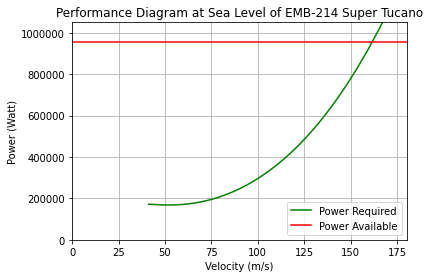

In [205]:
# Visualize Performance Diagram at Sea Level
plt.plot(figsize=(8,5))
plt.plot(performance_data_SL["Airspeed"], performance_data_SL["Power Required"], color="green")
plt.axhline(y=power_available, color='r', linestyle='-')

# Set axes limit
plt.ticklabel_format(style='plain') 
plt.ylim(0, power_available*1.1)
plt.xlim(0, 1.1*max_speed*1000/3600)

plt.legend(["Power Required", "Power Available"])
plt.grid()
plt.title("Performance Diagram at Sea Level of EMB-214 Super Tucano")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Power (Watt)")

In [71]:
power_available_SL

954496.0

Power available at sea level is 954,496.0 Watt. Maximum Speed is speed when power required is equal to power available

In [72]:
performance_data_SL[-13:-8]

,Unnamed: 0,CL,CD,CL/CD,CL3/CD2,gamma,Airspeed,Drag,Power Required,Power Excessive,Rate of Climb
155,155,0.15000,0.01946,7.70713,8.90998,0.03432,148.33275,5088.39179,754775.14527,199720.85473,5.08973
156,156,0.14000,0.01927,7.26367,7.38653,0.02076,153.56767,5401.06329,829428.70361,125067.29639,3.18724
157,157,0.13000,0.01910,6.80682,6.02326,0.00571,159.38057,5764.71477,918783.51537,35712.48463,0.91010
158,158,0.12000,0.01894,6.33714,4.81911,-0.01115,165.88475,6191.68679,1027106.39961,-72610.39961,-1.85042
159,159,0.11000,0.01879,5.85527,3.77126,-0.03029,173.22661,6698.58242,1160372.71453,-205876.71453,-5.24660


From the data above, we see that maximum speed is between 1.3 < CL < 1.2. Hence, we will do linear interpolation (assumed) to get the maximum speed.

In [73]:
# Linear interpolation to find maximum speed (analytically)
x_point1 = performance_data_SL["Power Required"].iloc[157] #changed manually
x_point2 = performance_data_SL["Power Required"].iloc[158]
y_point1 = performance_data_SL["Airspeed"].iloc[157]
y_point2 = performance_data_SL["Airspeed"].iloc[158]
max_speed_SL = np.interp(power_available_SL, [x_point1, x_point2], [y_point1, y_point2])
print(f"Maximum speed based on analytical calculation is {max_speed_SL} m/s")

Maximum speed based on analytical calculation is 161.52490181247822 m/s



## **Problem 7b: Plot the trade-off curve for the maximum speed. What should we do to match the actual maximum speed?**

In [77]:
# Create trade-off curve data for maximum speed
true_max_speed = max_speed*1000/3600 
analytic_max_speed = max_speed_SL
CD0 = 0.018
K = 0.065

trade_off_data = pd.DataFrame()
trade_off_data["W/S"] = pd.Series(np.arange(1000, 4500, 10))
trade_off_data["W/P true"] = (propeller_efficiency) / (((0.5*air_density_SL*(true_max_speed**3)*CD0)/(trade_off_data["W/S"]))+((2*K*air_density_SL*trade_off_data["W/S"])/((air_density_SL**2)*true_max_speed)))
trade_off_data["W/P analytic"] = (propeller_efficiency) / (((0.5*air_density_SL*(analytic_max_speed**3)*CD0)/(trade_off_data["W/S"]))+((2*K*air_density_SL*trade_off_data["W/S"])/((air_density_SL**2)*analytic_max_speed)))

trade_off_data

,W/S,W/P true,W/P analytic
0,1000,0.01627,0.01698
1,1010,0.01643,0.01714
2,1020,0.01658,0.01731
3,1030,0.01674,0.01747
4,1040,0.01690,0.01764
...,...,...,...
345,4450,0.05802,0.05986
346,4460,0.05810,0.05994
347,4470,0.05817,0.06001
348,4480,0.05825,0.06009


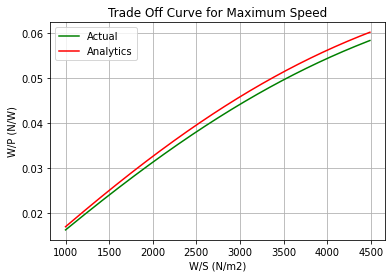

In [94]:
# Visualize Trade Off Curve for Maximum Speed
plt.plot(figsize=(8,5))
plt.plot(trade_off_data["W/S"], trade_off_data["W/P true"], color="green")
plt.plot(trade_off_data["W/S"], trade_off_data["W/P analytic"], color="red")

# Set axes limit
plt.grid()
plt.title("Trade Off Curve for Maximum Speed")
plt.xlabel("W/S (N/m2)")
plt.ylabel("W/P (N/W)")
plt.legend(["Actual", "Analytics"])

In [79]:
# Find Aircraft Wing Loading
aircraft_wing_loading = weight/wing_area
print(f"EMB-214 Super Tucano wing loading: {aircraft_wing_loading} N/m2")

EMB-214 Super Tucano wing loading: 2022.6804123711343 N/m2


In [173]:
# Find Aircraft Power Loading
maxspeed_powerload_true = (propeller_efficiency) / (((0.5*air_density_SL*(true_max_speed**3)*CD0)/(aircraft_wing_loading))+((2*K*air_density_SL*aircraft_wing_loading)/((air_density_SL**2)*true_max_speed)))
maxspeed_powerload_analytics = (propeller_efficiency) / (((0.5*air_density_SL*(analytic_max_speed**3)*CD0)/(aircraft_wing_loading))+((2*K*air_density_SL*aircraft_wing_loading)/((air_density_SL**2)*analytic_max_speed)))

maxspeed_true_power = maxspeed_powerload_true*weight
maxspeed_analytic_power = maxspeed_powerload_analytics*weight
maxspeed_delta_power = maxspeed_true_power - maxspeed_analytic_power
print(f"True power loading is {maxspeed_powerload_true:.5f} N/W, while analytic power loading is {maxspeed_powerload_analytics:.5f} N/W")
print(f"True power is {maxspeed_true_power:.3f} W, while analytic power is {maxspeed_analytic_power:.3f} N")
print(f"Power required: {maxspeed_delta_power:.3f} Watt")

True power loading is 0.03162 N/W, while analytic power loading is 0.03292 N/W
True power is 1240.615 W, while analytic power is 1291.885 N
Power required: -51.270 Watt


## **Problem 7c: If we want to improve the maximum rate of climb by 5%, can you achieve this by improving the aerodynamic efficiency? Explain your answer by plotting the trade-off curves for several relevant aerodynamic efficiency values.**

In [194]:
# Calculate W/P where CD0 is varied and using maximum target speed
K = 0.065
CD0_init = 0.018
CD0 = np.arange(CD0_init, 0, -0.0005)
target_max_speed = 1.05*analytic_max_speed

improve_data = pd.DataFrame()
improve_data["W/S"] = pd.Series(np.arange(1000, 4500, 10))

for CD in CD0:
  ratio_CLCD = 1 / (2*np.sqrt(CD*K))
  column_name = str(round(ratio_CLCD, 3))
  improve_data[column_name] = (propeller_efficiency) / (((0.5*air_density_SL*(target_max_speed**3)*CD)/(improve_data["W/S"]))+((2*K*air_density_SL*improve_data["W/S"])/((air_density_SL**2)*target_max_speed)))

# The number in column title represents CL/CD
improve_data.iloc[:,0:7]

,W/S,14.618,14.825,15.041,15.268,15.504,15.752
0,1000,0.01470,0.01512,0.01556,0.01602,0.01652,0.01704
1,1010,0.01485,0.01527,0.01571,0.01618,0.01668,0.01721
2,1020,0.01499,0.01541,0.01586,0.01633,0.01684,0.01737
3,1030,0.01513,0.01556,0.01601,0.01649,0.01700,0.01754
4,1040,0.01528,0.01571,0.01616,0.01665,0.01716,0.01771
...,...,...,...,...,...,...,...
345,4450,0.05380,0.05504,0.05634,0.05770,0.05914,0.06064
346,4460,0.05387,0.05511,0.05642,0.05778,0.05921,0.06072
347,4470,0.05395,0.05519,0.05649,0.05786,0.05929,0.06080
348,4480,0.05402,0.05527,0.05657,0.05794,0.05937,0.06088


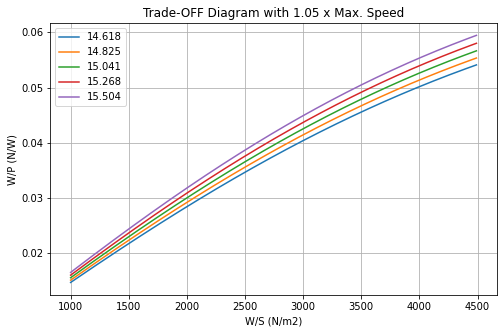

In [197]:
# Visualize
plt.figure(figsize=(8,5))

# Plot Trade-OFF value with random CL/CD
plt.plot(improve_data["W/S"], improve_data["14.618"])
plt.plot(improve_data["W/S"], improve_data["14.825"])
plt.plot(improve_data["W/S"], improve_data["15.041"])
plt.plot(improve_data["W/S"], improve_data["15.268"])
plt.plot(improve_data["W/S"], improve_data["15.504"])

plt.legend(["14.618", "14.825", "15.041", "15.268", "15.504"])
plt.title("Trade-OFF Diagram with 1.05 x Max. Speed")
plt.xlabel("W/S (N/m2)")
plt.ylabel("W/P (N/W)")
plt.grid()

# **PROBLEM 8**

## **Problem 8a: Calculate the maximum rate of climb at sea level and 4000 kg, if you have not done so. How does the actual maximum rate of climb compare to your calculation?**

In [140]:
# From Problem 2
print(f"""Maximum Rate of Climb\n 
Sea Level: {performance_data_SL["Rate of Climb"].max():4f} m/s\n
5,000 m: {performance_data_5000["Rate of Climb"].max():4f} m/s\n
10,000 m: {performance_data_10000["Rate of Climb"].max():.4f} m/s
""")

Maximum Rate of Climb
 
Sea Level: 20.043547 m/s

5,000 m: 14.714754 m/s

10,000 m: 8.8808 m/s



In [144]:
def roc_diff(RATE_OF_CLIMB):
  diff = abs((max_ROC-RATE_OF_CLIMB)*100/max_ROC)
  return diff

print(f"""Analytics Rate of Climb difference to Actual Value\n
Sea Level: {roc_diff(performance_data_SL["Rate of Climb"].max()):.4f}%
5,000m: {roc_diff(performance_data_5000["Rate of Climb"].max()):.4f}%
10,000m: {roc_diff(performance_data_10000["Rate of Climb"].max()):.4f}%
""")

Analytics Rate of Climb difference to Actual Value

Sea Level: 22.2168%
5,000m: 10.2759%
10,000m: 45.8487%



## **Problem 8b: Plot the trade-off curve for the maximum rate of climb. What should we do to match the actual maximum rate of climb?**

In [201]:
# Create trade-off curve data for Maximum Rate of Climb
CD0 = 0.018
K = 0.065
ratio_LDmax = 14.62
roc_analytics = performance_data_SL["Rate of Climb"].max()
roc_true = max_ROC

trade_off_data2 = pd.DataFrame()
trade_off_data2["W/S"] = pd.Series(np.arange(1000, 4500, 10))
trade_off_data2["W/P true"] = (propeller_efficiency)/((roc_true)+(np.sqrt(2*trade_off_data2["W/S"]/(air_density_SL*np.sqrt(3*CD0/K)))*(1.155/(ratio_LDmax))))
trade_off_data2["W/P analytic"] = (propeller_efficiency)/((roc_analytics)+(np.sqrt(2*trade_off_data2["W/S"]/(air_density_SL*np.sqrt(3*CD0/K)))*(1.155/(ratio_LDmax))))

trade_off_data2

,W/S,W/P true,W/P analytic
0,1000,0.04052,0.03421
1,1010,0.04049,0.03418
2,1020,0.04045,0.03416
3,1030,0.04042,0.03413
4,1040,0.04038,0.03411
...,...,...,...
345,4450,0.03411,0.02952
346,4460,0.03410,0.02952
347,4470,0.03409,0.02951
348,4480,0.03408,0.02950


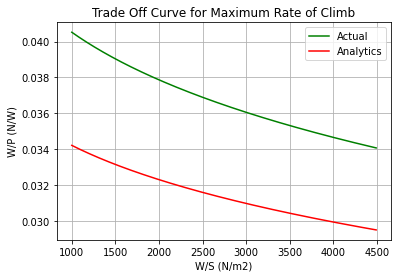

In [148]:
# Visualize Trade Off Curve for Maximum Rate of Climb
plt.plot(figsize=(8,5))
plt.plot(trade_off_data2["W/S"], trade_off_data2["W/P true"], color="green")
plt.plot(trade_off_data2["W/S"], trade_off_data2["W/P analytic"], color="red")

# Set axes limit
plt.grid()
plt.title("Trade Off Curve for Maximum Rate of Climb")
plt.xlabel("W/S (N/m2)")
plt.ylabel("W/P (N/W)")
plt.legend(["Actual", "Analytics"])

In [149]:
# Find Aircraft Wing Loading
aircraft_wing_loading = weight/wing_area
print(f"EMB-214 Super Tucano wing loading: {aircraft_wing_loading} N/m2")

EMB-214 Super Tucano wing loading: 2022.6804123711343 N/m2


In [169]:
# Find Aircraft Power Loading
roc_powerload_true = (propeller_efficiency)/((roc_true)+(np.sqrt(2*aircraft_wing_loading/(air_density_SL*np.sqrt(3*CD0/K)))*(1.155/(ratio_LDmax))))
roc_powerload_analytics = (propeller_efficiency)/((roc_analytics)+(np.sqrt(2*aircraft_wing_loading/(air_density_SL*np.sqrt(3*CD0/K)))*(1.155/(ratio_LDmax))))

roc_true_power = roc_powerload_true*weight
roc_analytic_power = roc_powerload_analytics*weight
roc_delta_power = abs(roc_true_power - roc_analytic_power)
print(f"True power loading is {roc_powerload_true:.5f} N/W, while analytic power loading is {roc_powerload_analytics:.5f} N/W")
print(f"True power is {roc_true_power:.3f} W, while analytic power is {roc_analytic_power:.3f} N")
print(f"Additional power required: {roc_delta_power:.3f} Watt")

True power loading is 0.03782 N/W, while analytic power loading is 0.03226 N/W
True power is 1483.886 W, while analytic power is 1265.867 N
Additional power required: 218.019 Watt


## **Problem 8c:**

In [202]:
# Calculate W/P where CD0 is varied and using maximum ROC
K = 0.065
CD0_init = 0.018
CD0 = np.arange(CD0_init, 0, -0.0005)
target_max_roc = 1.05*roc_analytics

improve_data2 = pd.DataFrame()
improve_data2["W/S"] = pd.Series(np.arange(1000, 4500, 10))

for CD in CD0:
  ratio_CLCD = 1 / (2*np.sqrt(CD*K))
  column_name = str(round(ratio_CLCD, 3))
  improve_data2[column_name] = (propeller_efficiency)/((target_max_roc)+(np.sqrt(2*improve_data2["W/S"]/(air_density_SL*np.sqrt(3*CD/K)))*(1.155/(ratio_LDmax))))

# The number in column title represents CL/CD
improve_data2.iloc[:,0:7]

,W/S,14.618,14.825,15.041,15.268,15.504,15.752
0,1000,0.03280,0.03277,0.03274,0.03270,0.03267,0.03263
1,1010,0.03278,0.03275,0.03271,0.03268,0.03264,0.03261
2,1020,0.03276,0.03272,0.03269,0.03266,0.03262,0.03258
3,1030,0.03273,0.03270,0.03267,0.03263,0.03260,0.03256
4,1040,0.03271,0.03268,0.03265,0.03261,0.03258,0.03254
...,...,...,...,...,...,...,...
345,4450,0.02847,0.02842,0.02837,0.02831,0.02826,0.02820
346,4460,0.02846,0.02841,0.02836,0.02831,0.02825,0.02819
347,4470,0.02845,0.02840,0.02835,0.02830,0.02824,0.02818
348,4480,0.02845,0.02840,0.02834,0.02829,0.02823,0.02818


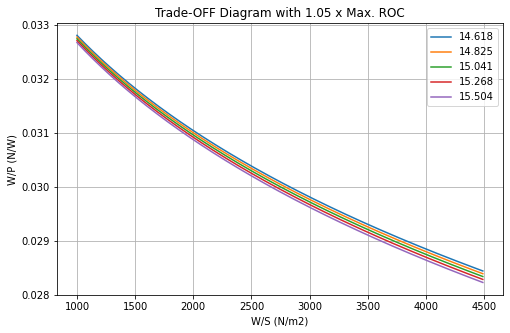

In [204]:
# Visualize
plt.figure(figsize=(8,5))

# Plot Trade-OFF value with random CL/CD
plt.plot(improve_data2["W/S"], improve_data2["14.618"])
plt.plot(improve_data2["W/S"], improve_data2["14.825"])
plt.plot(improve_data2["W/S"], improve_data2["15.041"])
plt.plot(improve_data2["W/S"], improve_data2["15.268"])
plt.plot(improve_data2["W/S"], improve_data2["15.504"])

plt.legend(["14.618", "14.825", "15.041", "15.268", "15.504"])
plt.title("Trade-OFF Diagram with 1.05 x Max. ROC")
plt.xlabel("W/S (N/m2)")
plt.ylabel("W/P (N/W)")
plt.grid()